## Naive Bayes model with hyperparameter tuning

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# load the dataset
data = pd.read_csv('repurchase_training.csv')

In [2]:
# encode categorical variables using label encoding
encoder = LabelEncoder()
data['age_band'] = encoder.fit_transform(data['age_band'])
data['gender'] = encoder.fit_transform(data['gender'])
data['car_model'] = encoder.fit_transform(data['car_model'])
data['car_segment'] = encoder.fit_transform(data['car_segment'])

# split the dataset into training and testing sets
X = data.drop(['ID', 'Target'], axis=1)
y = data['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create and train the Naive Bayes model
nb = GaussianNB()
nb.fit(X_train, y_train)

# make predictions on the testing set and calculate accuracy
y_pred = nb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.7890970001522766


In [3]:
print('Prediction:', y_pred)

Prediction: [1 0 1 ... 0 0 0]


In this code, we use the LabelEncoder class from scikit-learn to encode the categorical variables as numerical values. We then train a Naive Bayes model on the encoded dataset and make predictions on the testing set to calculate the model's accuracy.

Histogram of the 'age_of_vehicle_years' column:

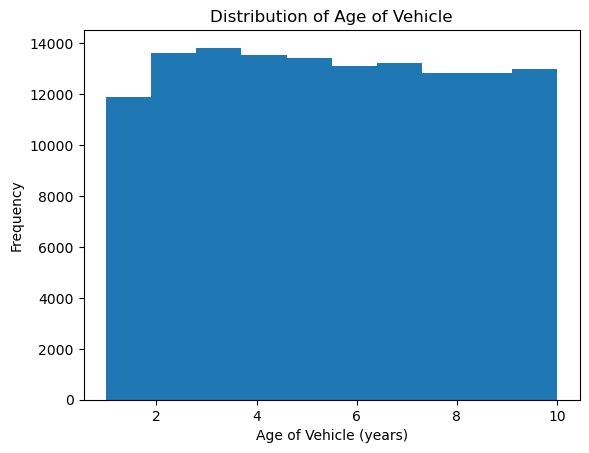

In [4]:
plt.hist(data['age_of_vehicle_years'], bins=10)
plt.title('Distribution of Age of Vehicle')
plt.xlabel('Age of Vehicle (years)')
plt.ylabel('Frequency')
plt.show()

Bar chart of the number of customers who purchased more than one vehicle vs. customers who purchased only one vehicle:

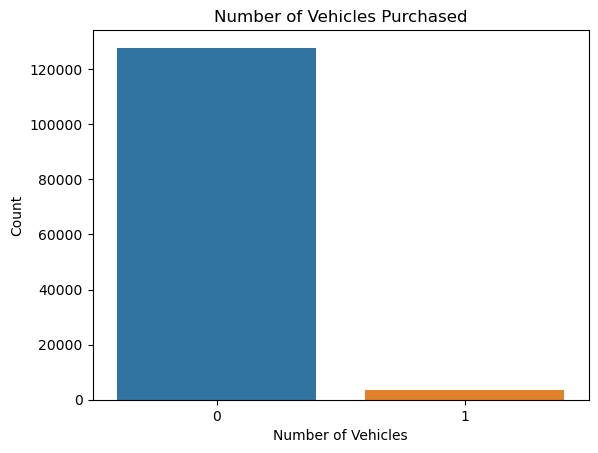

In [5]:
sns.countplot(x='Target', data=data)
plt.title('Number of Vehicles Purchased')
plt.xlabel('Number of Vehicles')
plt.ylabel('Count')
plt.show()

Scatter plot of 'annualised_mileage' vs. 'total_paid_services' with hue based on 'Target':

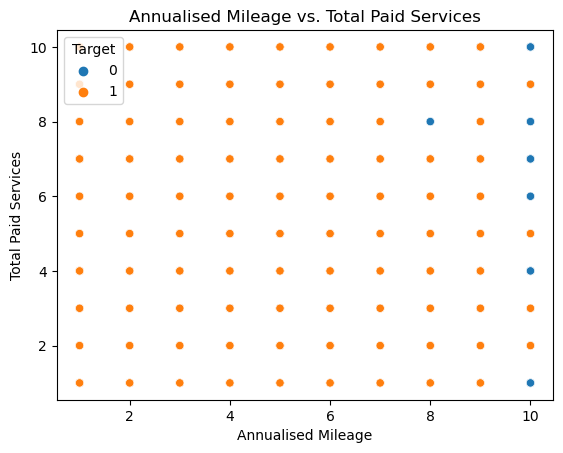

In [6]:
sns.scatterplot(x='annualised_mileage', y='total_paid_services', hue='Target', data=data)
plt.title('Annualised Mileage vs. Total Paid Services')
plt.xlabel('Annualised Mileage')
plt.ylabel('Total Paid Services')
plt.show()

Confusion matrix:

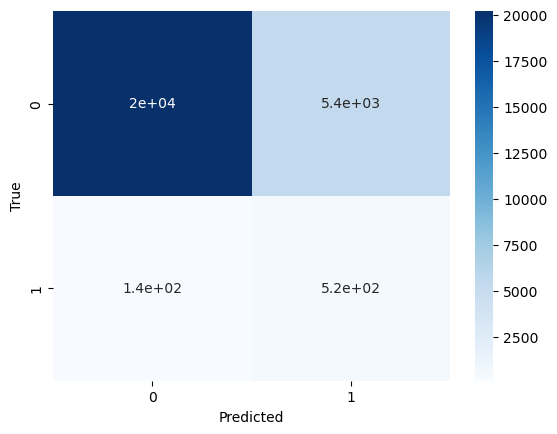

In [7]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# plot confusion matrix as heatmap
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Box plot to visualize the distribution of the 'age_band' feature for the two classes:

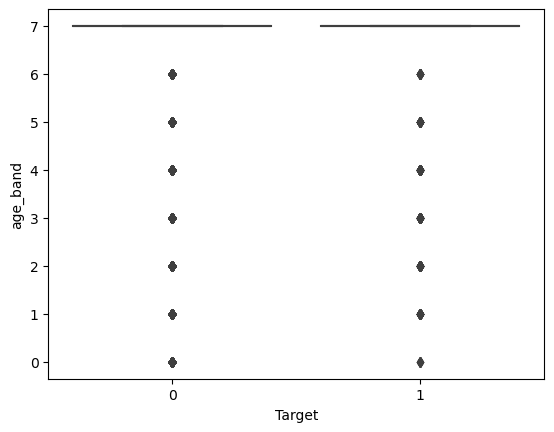

In [8]:
sns.boxplot(x='Target', y='age_band', data=data)
plt.show()

We can extract the indices of the false negative cases and look at their feature values:

In [9]:
import numpy as np

# extract indices of false negative cases
fn_indices = np.where((y_test == 1) & (y_pred == 0))[0]

# print feature values for false negative cases
print(X_test.iloc[fn_indices])


        age_band  gender  car_model  car_segment  age_of_vehicle_years  \
131110         2       1         14            1                     1   
130329         7       2         11            3                     3   
130725         1       1         14            1                     3   
131103         7       2         11            3                     2   
131240         7       0         12            1                     2   
...          ...     ...        ...          ...                   ...   
131023         7       2         12            1                     2   
130484         7       2         12            1                     2   
130513         7       1          0            0                     4   
128523         7       2         13            3                     8   
130535         7       2         17            1                     5   

        sched_serv_warr  non_sched_serv_warr  sched_serv_paid  \
131110                1                    2  

Confusion matrix, precision, recall, and F1-score for each class:

In [10]:
from sklearn.metrics import confusion_matrix, classification_report

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm)

# Calculate classification report
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[20207  5401]
 [  139   521]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.79      0.88     25608
           1       0.09      0.79      0.16       660

    accuracy                           0.79     26268
   macro avg       0.54      0.79      0.52     26268
weighted avg       0.97      0.79      0.86     26268

